# Linear Regression

In regression, we aim to find a function $f$ that maps inputs $x \in \mathbb{R}^D$ to corresponding function values $f(x) \in \mathbb{R}$. We assume we are given a set of training inputs $x_n$ and corresponding noisy observations $yn = f(x_n)+\epsilon$, where $\epsilon$ is an i.i.d. random variable that describes measurement/observation noise and potentially unmodeled processes. Our task is to find a function that not only models the training data, but generalizes well to predicting function values at input locations that are not part of the training data. An illustration of such a regression problem is in the figure below:

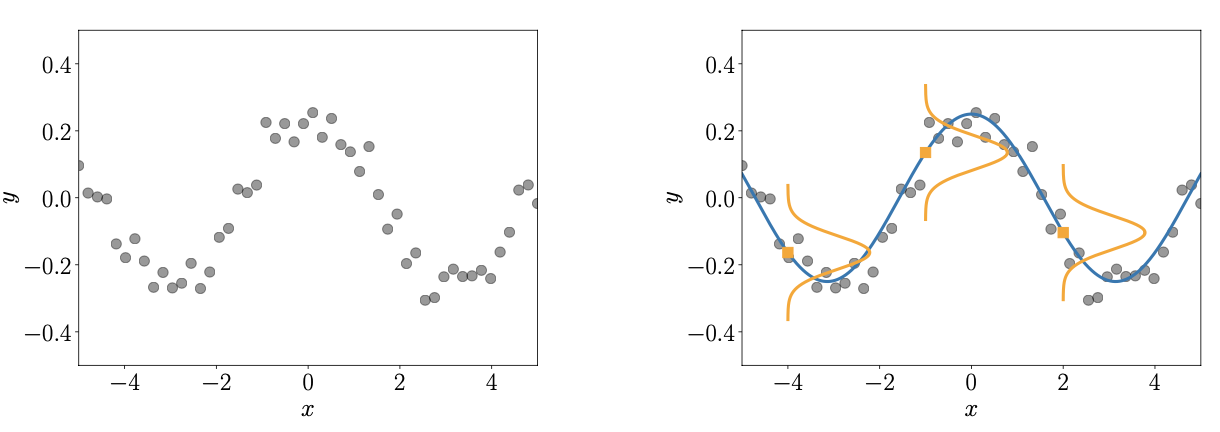

_Left: Regression problem: observed noisy function values from which we wish to infer the underlying function that generated the data_

_Right: Regression solution: possible function that could have generated the data (blue) with indication of the measurement noise of the function value at the corresponding inputs (orange distributions)_

For some input values $x_n$, we observe (noisy) function values $y_n = f(x_n) + \epsilon$. The task is to infer the function $f$ that generated the data and generalizes well to function values at new input locations.

Finding a regression function requires solving a variety of problems, including the following:

- **Choice of the model (type) and the parametrization** of the regression function. Given a dataset, what function classes (e.g., polynomials) are good candidates for modeling the data, and what particular parametrisation (e.g., degree of the polynomial) should we choose? Model selection, as discussed previously, allows us to compare various models to find the simplest model that explains the training data reasonably well.
- **Finding good parameters.** Having chosen a model of the regression function, how do we find good model parameters? Here, we will need to look at different loss/objective functions (they determine what a "good" fit is) and optimisation algorithms that allow us to minimise this loss.
- **Overfitting and model selection.** Overfitting is a problem when the regression function fits the training data "too well" but does not generalise to unseen test data. Overfitting typically occurs if the underlying model (or its parametrization) is overly flexible and expressive. We will look at the underlying reasons and discuss ways to mitigate the effect of overfitting in the context of linear regression.
- **Relationship between loss functions and parameter priors.** Loss functions (optimisation objectives) are often motivated and induced by probabilistic models. We will look at the connection between loss functions and the underlying prior assumptions that induce these losses.
- **Uncertainty modeling.** In any practical setting, we have access to only a finite, potentially large, amount of (training) data for selecting the model class and the corresponding parameters. Given that this finite amount of training data does not cover all possible scenarios, we may want to describe the remaining parameter uncertainty to obtain a measure of confidence of the model’s prediction at test time; the smaller the training set, the more important uncertainty modeling. Consistent modeling of uncertainty equips model predictions with confidence bounds.

## Problem Foundation

Because of the presence of observation noise, we will adopt a probabilistic approach and explicitly model the noise using a likelihood function. More specifically, throughout this chapter, we consider a regression problem with the likelihood function

\begin{equation}
p(y|x) = \mathcal{N}(y|f(x), \sigma^2)
\end{equation}

Here, $x \in \mathbb{R}^D$ are inputs and $y \in \mathbb{R}$ are noisy function values (targets). With above equation, the functional relationship between $x$ and $y$ is given as

\begin{equation}
y = f(x) + \epsilon
\end{equation}

where $\epsilon ~ \mathcal{N}(0, \sigma^2)$ is independent, identically distributed (i.i.d.) Gaussian measurement noise with mean 0 and variance $\sigma^2$. Our objective is to find a function that is close (similar) to the unknown function $f$ that generated the data and that generalizes well.

In this chapter, we focus on parametric models, i.e., we choose a parametrised function and find parameters $\theta$ that "work well" for modeling the data. For the time being, we assume that the noise variance $\sigma^2$ is known and focus on learning the model parameters $\theta$. In linear regression, we consider the special case that the parameters $\theta$ appear linearly in our model

For $x, \theta \in \mathbb{R}$ the linear regression model describes straight lines (linear functions), and the parameter $\theta$ is the slope of the line.

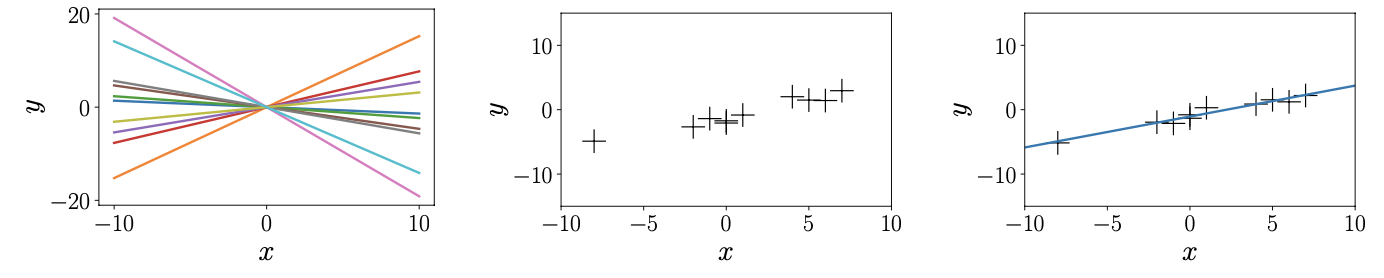

_Left: Example functions (straight lines) that can be described using the linear model_

_Middle: Training Set_

_Right: Maximum likelihood estimate_

## Parameter Estimation

### Maximum Likelihood Estimation

A widely used approach to finding the desired parameters $\theta_{ML}$ is maximum likelihood estimation, where we find parameters $\theta_{ML}$ that maximize the likelihood. Intuitively, maximising the likelihood means maximising the predictive distribution of the training data given the model parameters.

To find the desired parameters $\theta_{ML}$ that maximise the likelihood, we typically perform gradient ascent (or gradient descent on the negative likelihood). In the case of linear regression we consider here, however, a closed-form solution exists, which makes iterative gradient descent unnecessary. In practice, instead of maximising the likelihood directly, we apply the log-transformation to the likelihood function and minimise the negative log-likelihood.

#### Maximum Likelihood Estimation with Features

So far, we considered the linear regression in a linear setting, which allowed us to fit straight lines to data using maximum likelihood estimation. However, straight lines are not sufficiently expressive when it comes to fitting more interesting data. Fortunately, linear regression offers us a way to fit nonlinear functions within the linear regression framework: Since "linear regression" only refers to "linear in the parameters", we can perform an arbitrary nonlinear transformation $\phi(x)$ of the inputs $x$ and then linearly combine the components of this transformation.

We are concerned with a regression problem $y=\phi^{\top}(x)\theta+\epsilon$ where $x \in \mathbb{R}$ and $\theta in \mathbb{R}^K$.  A transformation that is often used in this context is

\begin{equation}
\phi(x) = \begin{bmatrix}
\phi_0(x)\\
\phi_1(x)\\
\vdots \\
\phi_{K-1}(x)
\end{bmatrix} =
\begin{bmatrix}
1\\
x\\
x^2\\
x^3\\
\vdots \\
x^{K-1}
\end{bmatrix} = \in \mathbb{R}^K
\end{equation}

This means that we "lift" the original one-dimensional input space into a $K$-dimensional feature space consisting of all monomials $x^k \text{ for } k = 0, \cdots , K − 1$. With these features, we can model polynomials of degree $ \leqslant K−1$ within the framework of linear regression: A polynomial of degree $K − 1$ is

\begin{equation}
f(x) = \sum_{k=0}^{K-1}\theta_kx^k = \phi^{\top}(x)\theta
\end{equation}

### Overfitting in Linear Regression

Above we used maximum likelihood estimation to fit linear models (e.g., polynomials) to data. We can evaluate the quality of the model by computing the error/loss incurred. One way of doing this is to compute the negative log-likelihood, which we minimised to determine the maximum likelihood estimator. Alternatively, given that the noise parameter $\sigma^2$ is not a free model parameter, we can ignore the scaling by $1/\sigma^2$ so that we end up with a squared-error-loss function $||y-\phi\theta||^2$. Instead of using this squared loss, we often use the root mean square error (RMSE):

\begin{equation}
\sqrt{\frac{1}{N}||y-\phi\theta||^2} = \sqrt{\frac{1}{N}\sum^N_{n=1}(y_n - \phi^{\top}(x_n)\theta)^2}
\end{equation}

which (a) allows us to compare errors of datasets with different sizes and (b) has the same scale and the same units as the observed function values $y_n$. For example, if we fit a model that maps post-codes (x is given in latitude, longitude) to house prices (y-values are EUR) then the RMSE is also measured in EUR, whereas the squared error is given in EUR$^2$. If we choose to include the factor $\sigma^2$ from the original negative log-likelihood, then we end up with a unitless objective, i.e., in the preceding example, our objective would no longer be in EUR or EUR$^2$.

For model selection, we can use the RMSE (or the negative log-likelihood) to determine the best degree of the polynomial by finding the polynomial degree M that minimizes the objective. Given that the polynomial degree is a natural number, we can perform a brute-force search and enumerate all (reasonable) values of $M$. For a training set of size N it is sufficient to test $0 \leqslant M \leqslant N - 1$. For $M < N$, the maximum likelihood estimator is unique. For $M \geqslant N$, we have more parameters than data points, and would need to solve an underdetermined system of linear equations so that there are infinitely many possible maximum likelihood estimators.

Figure below shows a number of polynomial fits determined by maximum likelihood for a dataset with $N = 10$ observations. We notice that polynomials of low degree (e.g., constants ($M = 0$) or linear ($M = 1$)) fit the data poorly and, hence, are poor representations of the true underlying function. For degrees $M = 3, \cdots , 6$, the fits look plausible and smoothly interpolate the data. When we go to higher-degree polynomials, we notice that they fit the data better and better. In the extreme case of $M = N − 1 = 9$, the function will pass through every single data point. However, these high-degree polynomials oscillate wildly and are a poor representation of the underlying function that generated the data, such that we suffer from overfitting.

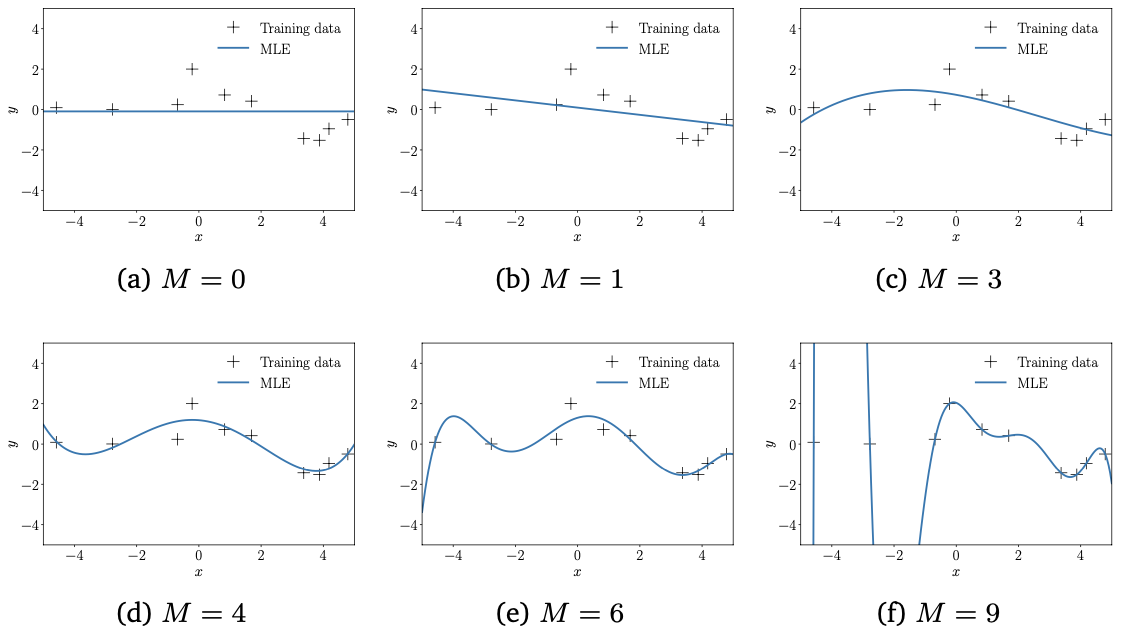

_Maximum likelihood fits for different polynomial degrees M._

Remember that the goal is to achieve good generalization by making accurate predictions for new (unseen) data. We obtain some quantitative insight into the dependence of the generalization performance on the polynomial of degree $M$ by considering a separate test set comprising 200 data points generated using exactly the same procedure used to generate the training set. As test inputs, we chose a linear grid of 200 points in the interval of $[−5, 5]$. For each choice of $M$ , we evaluate the RMSE for both the training data and the test data.

Looking now at the test error, which is a qualitive measure of the gen- eralization properties of the corresponding polynomial, we notice that initially the test error decreases; see Figure below. For fourth-order polynomials, the test error is relatively low and stays relatively constant up to degree 5. However, from degree 6 onward the test error increases significantly, and high-order polynomials have very bad generalization properties. In this particular example, this also is evident from the corresponding maximum likelihood fits in the figure above. Note that the training error (blue curve) never increases when the degree of the polynomial increases. In our example, the best generalization (the point of the smallest test error) is obtained for a polynomial of degree M = 4.

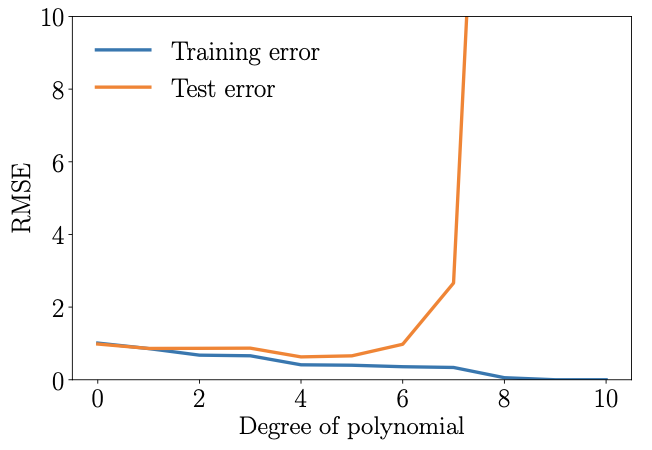

_Training and test error._

In [ ]:
\mathcal{X}

In [ ]:
\mathbb{R}